In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Documents/Mall_Customers.csv')

In [5]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
X = dataset.iloc[:, [3,4]].values

# Clustering


In [17]:
#using the elbow method to find the optimal num of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

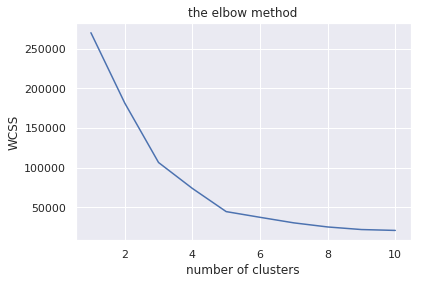

In [18]:
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
#applying kmeans to the mall dataset
kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter=300, n_init= 10, random_state=0)
y_kmeans =kmeans.fit_predict(X)

In [21]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

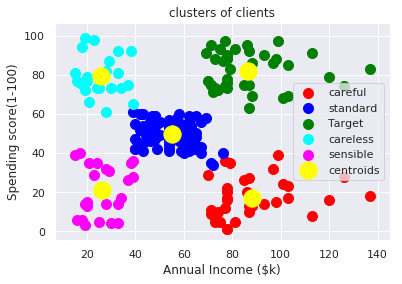

In [26]:
#Visualizing the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s= 100, c='red', label = 'careful')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s= 100, c='blue', label = 'standard')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s= 100, c='green', label = 'Target')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s= 100, c='cyan', label = 'careless')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s= 100, c='magenta', label = 'sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c='yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

Text(0, 0.5, 'euclidean distance')

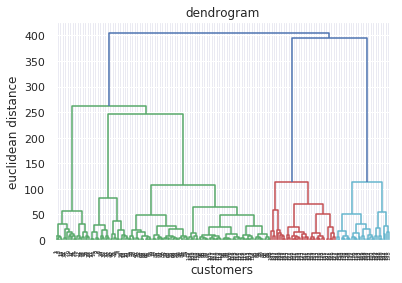

In [28]:
#Using  Hierarchical clustering
#Using dendrogram to find optimal number of clustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distance')


In [29]:
#look for the largest vertical distance you can make without crossing any horizontal line ('which is 5')

In [30]:
#fitting hierarchical clustering into the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [31]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

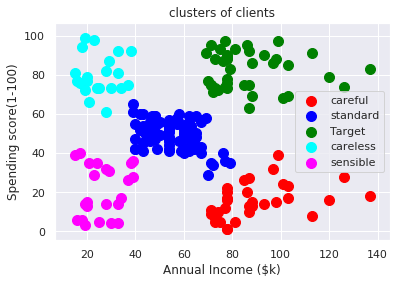

In [32]:
#visualizing the clusters
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s= 100, c='red', label = 'careful')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s= 100, c='blue', label = 'standard')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s= 100, c='green', label = 'Target')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s= 100, c='cyan', label = 'careless')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s= 100, c='magenta', label = 'sensible')
plt.title('clusters of clients')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()
